In [6]:
import pandas as pd    #load the data, statistics
import seaborn as sns   #visualize the data
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder #nominal, categorical
from sklearn.compose import ColumnTransformer


train_df = pd.read_csv('../input/train.csv')
#sex
#age under 7
#age over 60
#pclass

# Creating new categories for age
train_df['<7 yrs'] = train_df['Age'].apply(lambda x: 1 if x < 7 else 0)
train_df['>60 yrs'] = train_df['Age'].apply(lambda x: 1 if x > 60 else 0)

selected_columns = train_df.drop(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
print(selected_columns)


onehot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Sex', 'Pclass'])
    ], remainder='passthrough')

# Define the features (X) and target (y)
X = selected_columns[['Sex', 'Pclass', '<7 yrs', '>60 yrs']]
y = selected_columns['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

     PassengerId  Survived  Pclass     Sex  <7 yrs  >60 yrs
0              1         0       3    male       0        0
1              2         1       1  female       0        0
2              3         1       3  female       0        0
3              4         1       1  female       0        0
4              5         0       3    male       0        0
..           ...       ...     ...     ...     ...      ...
886          887         0       2    male       0        0
887          888         1       1  female       0        0
888          889         0       3  female       0        0
889          890         1       1    male       0        0
890          891         0       3    male       0        0

[891 rows x 6 columns]


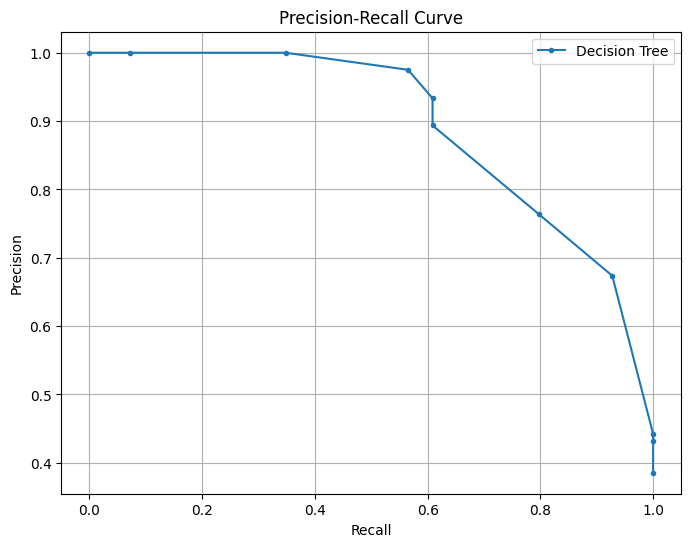

Accuracy: 0.83
Precision: 0.93
Recall: 0.61
F1: 0.74
Confusion Matrix:
[[107   3]
 [ 27  42]]


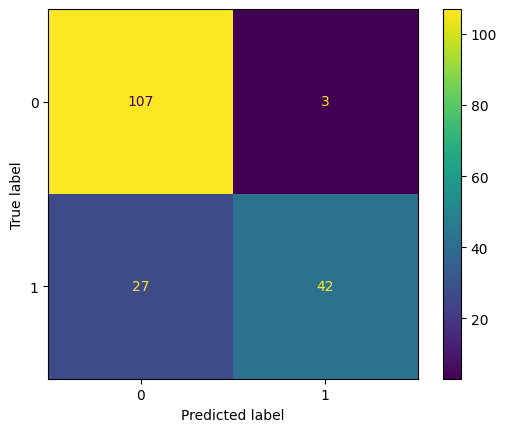

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

#decision tree
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])


pipeline_dt.fit(X_train, y_train)

prediction = pipeline_dt.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prediction)

precision, recall, thresholds = precision_recall_curve(y_test, prediction)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

predictions = pipeline_dt.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1: {f1:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_dt.classes_)
disp.plot()
print("Confusion Matrix:")
print(cm)

     PassengerId  Survived  Pclass     Sex   Age  <7 yrs  >60 yrs
0              1         0       3    male  22.0       0        0
1              2         1       1  female  38.0       0        0
2              3         1       3  female  26.0       0        0
3              4         1       1  female  35.0       0        0
4              5         0       3    male  35.0       0        0
..           ...       ...     ...     ...   ...     ...      ...
886          887         0       2    male  27.0       0        0
887          888         1       1  female  19.0       0        0
888          889         0       3  female   NaN       0        0
889          890         1       1    male  26.0       0        0
890          891         0       3    male  32.0       0        0

[891 rows x 7 columns]


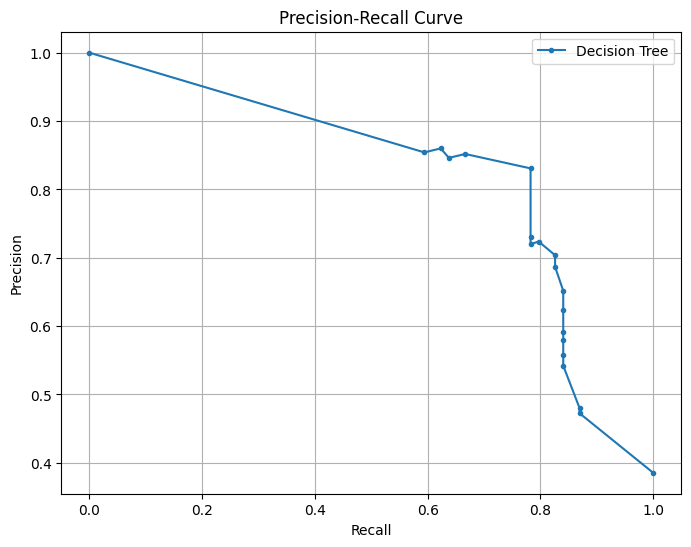

Accuracy: 0.85
Precision: 0.83
Recall: 0.78
F1: 0.81
Confusion Matrix:
[[99 11]
 [15 54]]


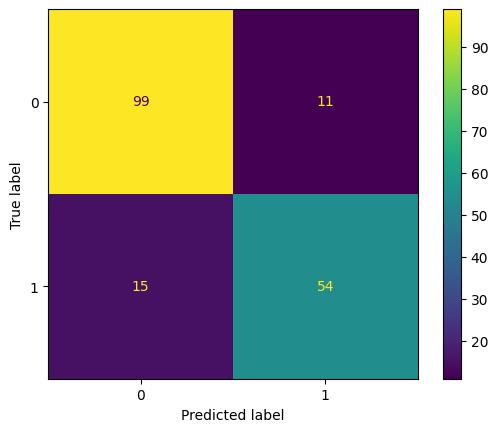

In [3]:
selected_columns = train_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
print(selected_columns)

onehot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Sex', 'Pclass'])
    ], remainder='passthrough')

# Define the features (X) and target (y)
X = selected_columns[['Sex', 'Pclass', 'Age']]
y = selected_columns['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

#decision tree
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])


pipeline_dt.fit(X_train, y_train)

prediction = pipeline_dt.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prediction)

precision, recall, thresholds = precision_recall_curve(y_test, prediction)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

predictions = pipeline_dt.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1: {f1:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_dt.classes_)
disp.plot()
print("Confusion Matrix:")
print(cm)